<a href="https://colab.research.google.com/github/Zendellll/Road2_AI_Course/blob/main/AICourse_task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dots_filtered.zip', origin=_URL, extract=True)

!unzip ~/.keras/datasets/cats_and_dots_filtered.zip -d /content/

Archive:  /root/.keras/datasets/cats_and_dots_filtered.zip
replace /content/cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import os
print(len(os.listdir('/content/cats_and_dogs_filtered/train/cats')), len(os.listdir('/content/cats_and_dogs_filtered/train/dogs')))
print(len(os.listdir('/content/cats_and_dogs_filtered/validation/cats')), len(os.listdir('/content/cats_and_dogs_filtered/validation/dogs')))

1000 1000
500 500


# Load and evalute VGG-19 on our dataset
## Prompt:
Let's go back a bit. I have this code so far -
cell 1:
import tensorflow as tf

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dots_filtered.zip', origin=_URL, extract=True)

!unzip ~/.keras/datasets/cats_and_dots_filtered.zip -d /content/

cell 2:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

model = VGG19(weights='imagenet')

\# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

I want to take 8 random cat images and 8 random dog images, input them into the VGG model, and pick the highest probability prediction outputted from the model.
Then, I want you to plot all the images in a 4*4 grid, for each picture displaying the true class (cat/dog) and the VGG predicted class.

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet')

In [3]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

print(len(model.layers))

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
!mkdir /content/cats_and_dogs_filtered/train/train_total
!mkdir /content/cats_and_dogs_filtered/validation/val_total

!cp /content/cats_and_dogs_filtered/train/cats/*.jpg /content/cats_and_dogs_filtered/train/train_total
!cp /content/cats_and_dogs_filtered/train/dogs/*.jpg /content/cats_and_dogs_filtered/train/train_total

!cp /content/cats_and_dogs_filtered/validation/dogs/*.jpg /content/cats_and_dogs_filtered/validation/val_total
!cp /content/cats_and_dogs_filtered/validation/cats/*.jpg /content/cats_and_dogs_filtered/validation/val_total

1/1 [==============================] - 0s 19ms/step
[[('n02100583', 'vizsla', 0.1635295), ('n02102318', 'cocker_spaniel', 0.15193877), ('n02112137', 'chow', 0.112826794), ('n02123159', 'tiger_cat', 0.07070823), ('n02099601', 'golden_retriever', 0.06670139)]]
1/1 [==============================] - 0s 20ms/step
[[('n04557648', 'water_bottle', 0.33933294), ('n02123597', 'Siamese_cat', 0.13751657), ('n03983396', 'pop_bottle', 0.10417603), ('n02110185', 'Siberian_husky', 0.07158924), ('n02091467', 'Norwegian_elkhound', 0.040793743)]]
1/1 [==============================] - 0s 25ms/step
[[('n02123394', 'Persian_cat', 0.22975571), ('n02123045', 'tabby', 0.15945552), ('n02124075', 'Egyptian_cat', 0.08217599), ('n02127052', 'lynx', 0.080716856), ('n02971356', 'carton', 0.05307432)]]
1/1 [==============================] - 0s 18ms/step
[[('n02105855', 'Shetland_sheepdog', 0.5066703), ('n02105641', 'Old_English_sheepdog', 0.09928977), ('n02110063', 'malamute', 0.09326743), ('n02110185', 'Siberian_h

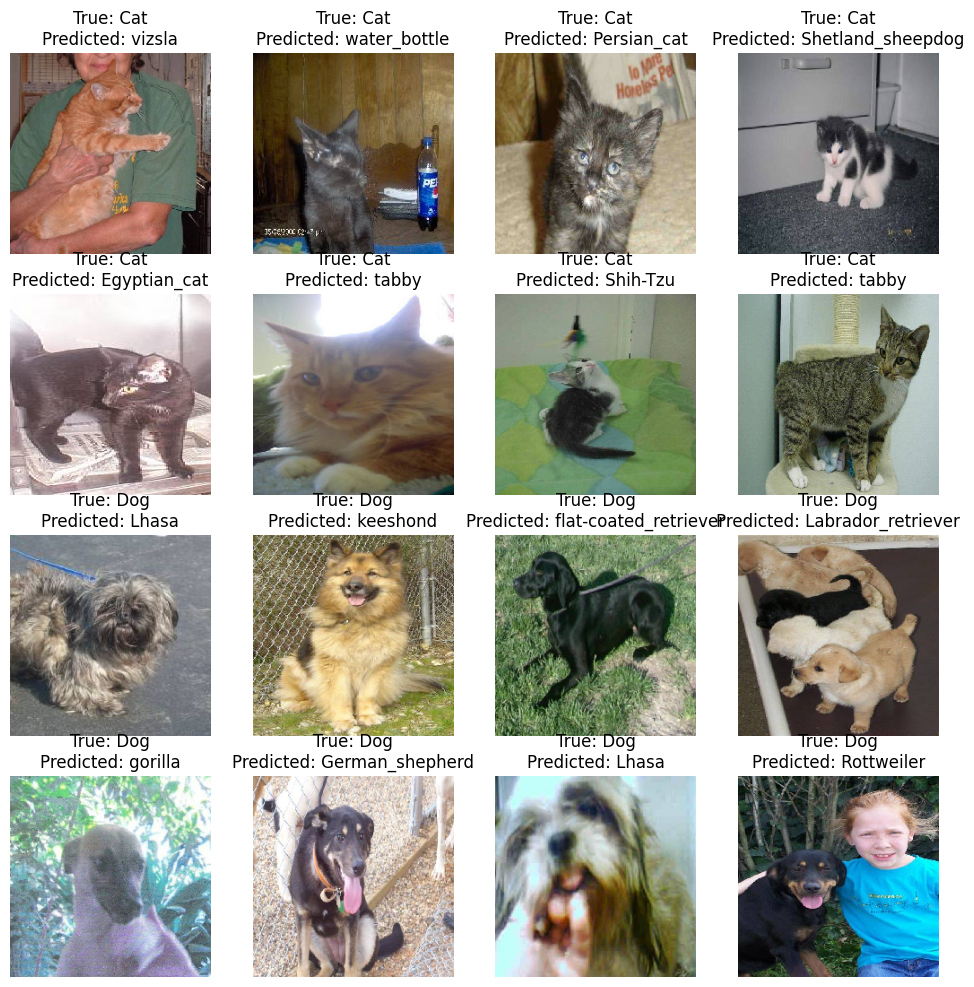

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg19 import decode_predictions, preprocess_input

# Path to the dataset
dataset_path = '/content/cats_and_dogs_filtered/validation'

# Get a list of cat and dog images
cat_images = [os.path.join(dataset_path, 'cats', img) for img in os.listdir(os.path.join(dataset_path, 'cats'))]
dog_images = [os.path.join(dataset_path, 'dogs', img) for img in os.listdir(os.path.join(dataset_path, 'dogs'))]

# Randomly select 8 cat and 8 dog images
selected_cat_images = random.sample(cat_images, 8)
selected_dog_images = random.sample(dog_images, 8)

# Function to preprocess an image for VGG model
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to make predictions and get the top predicted class
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions)
    top_prediction = decoded_predictions[0][0][1]
    return top_prediction

# Plotting images in a 4x4 grid
plt.figure(figsize=(12, 12))
for i, img_path in enumerate(selected_cat_images + selected_dog_images):
    plt.subplot(4, 4, i+1)
    true_class = os.path.split(os.path.split(img_path)[0])[1]
    true_class = "Cat" if true_class == "cats" else "Dog"
    predicted_class = predict_image(img_path)
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
    plt.axis('off')

plt.show()

# Create label files for cats and dogs

In [5]:
import os
from tqdm import tqdm

# Set the path to the image folder
image_folder_path = ["/content/cats_and_dogs_filtered/train/dogs", "/content/cats_and_dogs_filtered/validation/dogs"]

# Set the path to the label folder
label_folder_path = ["/content/cats_and_dogs_filtered/train/dog_labels", "/content/cats_and_dogs_filtered/validation/dog_labels"]

# Ensure the label folder exists
for dir in label_folder_path:
    os.makedirs(dir, exist_ok=True)

counter = 0
for dir in tqdm(image_folder_path, desc="Labeling images..."):
    # List all image files in the folder
    image_files = os.listdir(dir)

    # Iterate through each image file
    for image_file in image_files:
        # Get the image file name without the extension
        image_name = os.path.splitext(image_file)[0]

        # Create the label file path
        label_file_path = os.path.join(label_folder_path[counter], f"{image_name}.txt")

        # Write the label (0) to the label file
        with open(label_file_path, 'w') as label_file:
            label_file.write("1")

    counter += 1

print("Label files created successfully.")

Labeling images...: 100%|██████████| 2/2 [00:00<00:00, 11.07it/s]

Label files created successfully.


# Create TF Dataset from directory

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the paths to the training and validation data
train_cat_path = "/content/cats_and_dogs_filtered/train/cats"
train_dog_path = "/content/cats_and_dogs_filtered/train/dogs"
valid_cat_path = "/content/cats_and_dogs_filtered/validation/cats"
valid_dog_path = "/content/cats_and_dogs_filtered/validation/dogs"

train_cat_labels_path = "/content/cats_and_dogs_filtered/train/cat_labels"
train_dog_labels_path = "/content/cats_and_dogs_filtered/train/dog_labels"
valid_cat_labels_path = "/content/cats_and_dogs_filtered/validation/cat_labels"
valid_dog_labels_path = "/content/cats_and_dogs_filtered/validation/dog_labels"

# Create ImageDataGenerator with rescaling and other augmentations if needed
datagen = ImageDataGenerator(rescale=1./255)

# Create a function to load and preprocess the images and labels
def load_and_preprocess(image_path, label_path):
    # Load and preprocess image
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))  # Adjust the size as needed
    img = tf.keras.applications.vgg16.preprocess_input(img)

    # Load label
    label = tf.io.read_file(label_path)
    label = tf.strings.to_number(label, out_type=tf.dtypes.int32)

    return img, label

# Load and preprocess images and labels for cats in training set
train_cat_ds = tf.data.Dataset.list_files(train_cat_path + '/*')
train_cat_labels_ds = tf.data.Dataset.list_files(train_cat_labels_path + '/*')
train_cat_ds = tf.data.Dataset.zip((train_cat_ds, train_cat_labels_ds))
train_cat_ds = train_cat_ds.map(lambda x, y: load_and_preprocess(x, y))

# Load and preprocess images and labels for dogs in training set
train_dog_ds = tf.data.Dataset.list_files(train_dog_path + '/*')
train_dog_labels_ds = tf.data.Dataset.list_files(train_dog_labels_path + '/*')
train_dog_ds = tf.data.Dataset.zip((train_dog_ds, train_dog_labels_ds))
train_dog_ds = train_dog_ds.map(lambda x, y: load_and_preprocess(x, y))

# Load and preprocess images and labels for cats in validation set
valid_cat_ds = tf.data.Dataset.list_files(valid_cat_path + '/*')
valid_cat_labels_ds = tf.data.Dataset.list_files(valid_cat_labels_path + '/*')
valid_cat_ds = tf.data.Dataset.zip((valid_cat_ds, valid_cat_labels_ds))
valid_cat_ds = valid_cat_ds.map(lambda x, y: load_and_preprocess(x, y))

# Load and preprocess images and labels for dogs in validation set
valid_dog_ds = tf.data.Dataset.list_files(valid_dog_path + '/*')
valid_dog_labels_ds = tf.data.Dataset.list_files(valid_dog_labels_path + '/*')
valid_dog_ds = tf.data.Dataset.zip((valid_dog_ds, valid_dog_labels_ds))
valid_dog_ds = valid_dog_ds.map(lambda x, y: load_and_preprocess(x, y))

# Combine cat and dog datasets for training and validation sets
train_ds = train_cat_ds.concatenate(train_dog_ds)
valid_ds = valid_cat_ds.concatenate(valid_dog_ds)

# Freeze all model layers up the the final Conv2D layer, and reshape the output layer to have 2 neurons instead of 1000

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layers up to the final Conv2D layer
for layer in base_model.layers[:-2]:
    layer.trainable = False

# Add custom dense layers for classification
x = Flatten()(base_model.output)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dense(2, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the new model
model.summary()
print(len(model.layers))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Making sure the remainig trainable layers are the ones intended

In [6]:
for layer in model.layers:
    if layer.trainable == True:
        print(layer)

## Train the model

In [7]:
# Shuffle and batch the datasets
BATCH_SIZE = 32
train_ds = train_ds.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
valid_ds = valid_ds.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Train the fine-tuned model
epochs = 10  # Adjust as needed
history = model.fit(train_ds, epochs=epochs, validation_data=valid_ds)

# Display the accuracy of the trained model
accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f'Training Accuracy: {accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

Epoch 1/10
63/63 [==============================] - 41s 413ms/step - loss: 2.2942 - accuracy: 0.8835 - val_loss: 0.0986 - val_accuracy: 0.9820
Epoch 2/10
63/63 [==============================] - 19s 260ms/step - loss: 0.0529 - accuracy: 0.9895 - val_loss: 0.0819 - val_accuracy: 0.9820
Epoch 3/10
63/63 [==============================] - 19s 232ms/step - loss: 4.9794e-04 - accuracy: 0.9995 - val_loss: 0.0821 - val_accuracy: 0.9810
Epoch 4/10
63/63 [==============================] - 17s 226ms/step - loss: 2.1694e-05 - accuracy: 1.0000 - val_loss: 0.0816 - val_accuracy: 0.9820
Epoch 5/10
63/63 [==============================] - 19s 229ms/step - loss: 1.2351e-05 - accuracy: 1.0000 - val_loss: 0.0812 - val_accuracy: 0.9820
Epoch 6/10
63/63 [==============================] - 18s 237ms/step - loss: 9.5629e-06 - accuracy: 1.0000 - val_loss: 0.0808 - val_accuracy: 0.9830
Epoch 7/10
63/63 [==============================] - 19s 237ms/step - loss: 7.8153e-06 - accuracy: 1.0000 - val_loss: 0.0806 - 

# Run a sample test through the model
## Prompt:
Ok perfect, I have trained my model and it's saved in the variable 'model'.
I now want to take a sample of 10 random images from this path - /content/cats_and_dogs_filtered/validation/cats and 10 more random images from this path - /content/cats_and_dogs_filtered/validation/dogs.
For all the random images, I want to run them through the model and get the predicted class. Then, I want to plot all 20 images in a 4*5 grid, displaying every image and the class it was predicted to be.

1/1 [==============================] - 0s 27ms/step


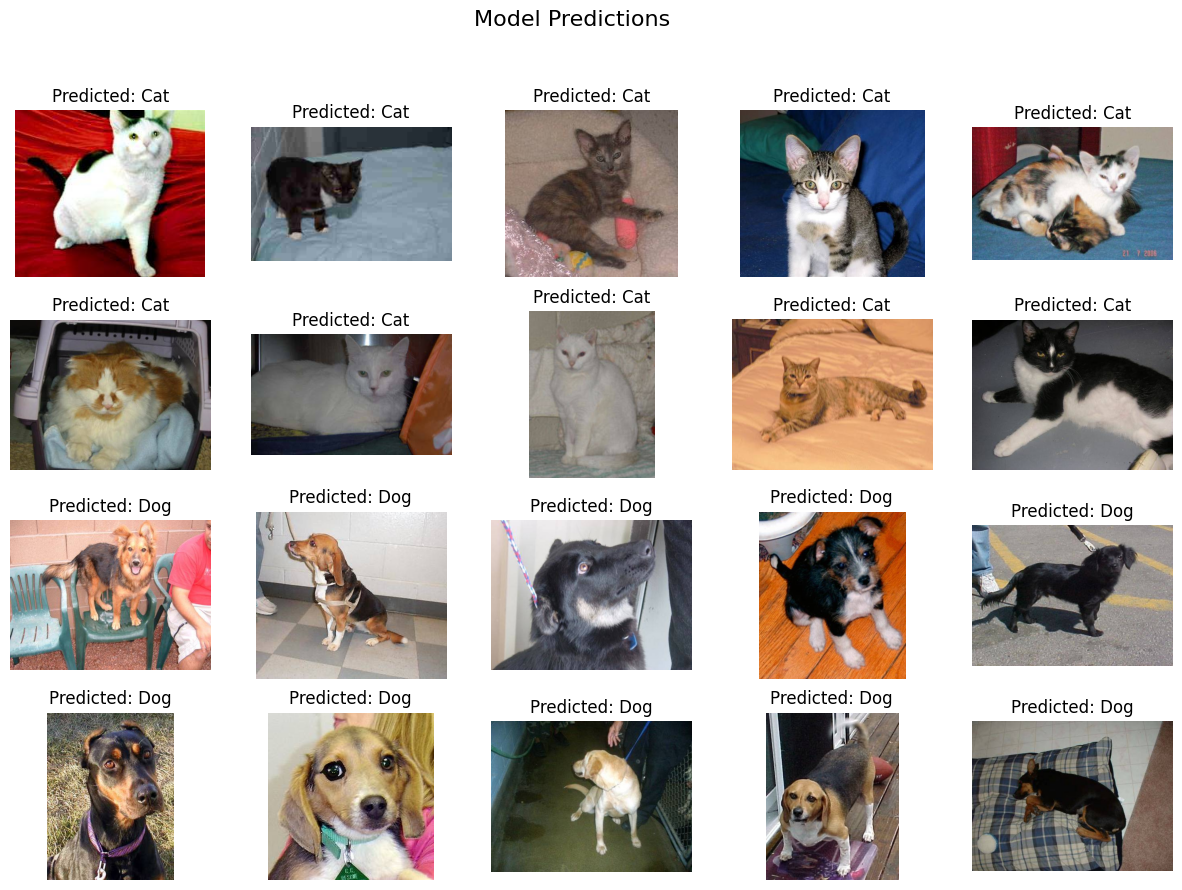

In [8]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

# Load your trained model if necessary
# model = load_model('path/to/your/model')

# Directory paths for cat and dog validation images
cats_path = '/content/cats_and_dogs_filtered/validation/cats'
dogs_path = '/content/cats_and_dogs_filtered/validation/dogs'

# Function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to make predictions and plot images
def plot_images_with_predictions(image_paths, title):
    plt.figure(figsize=(15, 10))
    plt.suptitle(title, fontsize=16)

    for i, img_path in enumerate(image_paths, 1):
        img_array = load_and_preprocess_image(img_path)
        prediction = model.predict(img_array)
        predicted_class = "Dog" if prediction[0][0] < 0.5 else "Cat"

        plt.subplot(4, 5, i)
        plt.imshow(image.load_img(img_path))
        plt.title(f'Predicted: {predicted_class}')
        plt.axis('off')

# Randomly select 10 cat and 10 dog images
cat_images = random.sample(os.listdir(cats_path), 10)
dog_images = random.sample(os.listdir(dogs_path), 10)

# Create full file paths
cat_image_paths = [os.path.join(cats_path, img) for img in cat_images]
dog_image_paths = [os.path.join(dogs_path, img) for img in dog_images]

# Plot images with predictions
plot_images_with_predictions(cat_image_paths + dog_image_paths, title='Model Predictions')
plt.show()

# Saving the model for both Keras and PyTorch
## Prompt:
Good. now the model is perfect and i want to save it.
Please save it twice -
save it once in a format compatible with Keras, and once in a format compatible for PyTorch.
Make sure you save both the architecture and the weights

In [11]:
!pip install torch
!pip install tf2onnx

# Save model compatible for Keras

In [9]:
# from tensorflow.keras.models import load_model

# Load your trained model if necessary
# keras_model = load_model('path/to/your/model')

# Save the model in Keras format (HDF5)
model.save('/content/cats_and_dogs_filtered/keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Extract architecture and weights
model_json = model.to_json()
weights = model.get_weights()

# Save architecture to a JSON file
architecture_path = '/content/cats_and_dogs_filtered/model_architecture.json'
with open(architecture_path, 'w') as json_file:
    json_file.write(model_json)

# Save weights to a NumPy file
weights_path = '/content/cats_and_dogs_filtered/model_weights.npy'
np.save(weights_path, weights)

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
import torch
import tf2onnx

# Convert Keras model to PyTorch model and save in ONNX format
onnx_model = tf2onnx.convert.from_keras(model)
onnx_path = '/content/cats_and_dogs_filtered/pytorch_model.onnx'
tf2onnx.save_model(onnx_model, onnx_path)

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tensorflow.keras.models import load_model, model_from_json

# Extract architecture and weights
model_json = model.to_json()
weights = model.get_weights()

# Save architecture to a JSON file
architecture_path = '/content/cats_and_dogs_filtered/model_architecture.json'
with open(architecture_path, 'w') as json_file:
    json_file.write(model_json)

# Save weights to a NumPy file
weights_path = '/content/cats_and_dogs_filtered/model_weights.npy'
np.save(weights_path, weights)

# Load architecture and weights into PyTorch model
class PyTorchModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(PyTorchModel, self).__init__()
        # Define the PyTorch model architecture based on the Keras model architecture

        # Example: Assuming a simple linear layer
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        # Define the forward pass based on the Keras model architecture

        # Example: Assuming a simple linear layer
        x = self.fc(x)
        return x

# Extract input size and output size from the Keras model
input_size = model.input_shape[1]
output_size = model.output_shape[-1]

# Create an instance of the PyTorch model
pytorch_model = PyTorchModel(input_size, output_size)

# Load the architecture from the saved JSON file
with open(architecture_path, 'r') as json_file:
    model_json = json_file.read()

# Load weights from the saved NumPy file
weights = np.load(weights_path, allow_pickle=True)

# Set PyTorch model parameters with Keras model weights
with torch.no_grad():
    # Set the PyTorch model architecture based on the Keras model architecture
    pytorch_model = model_from_json(model_json, custom_objects={})

    # Update the PyTorch model parameters
    state_dict = pytorch_model.state_dict()
    for name, param in zip(state_dict.keys(), weights):
        state_dict[name].copy_(torch.from_numpy(param))

AttributeError: ignored

In [ ]:
# Note: You need to have the onnx and torch libraries installed
onnx_model = onnx.load(onnx_path)
pytorch_model = tf2onnx.convert.from_onnx(onnx_model)
torch.onnx.export(pytorch_model, torch.randn(1, 224, 224, 3), 'path/to/your/pytorch_model.pth')